# Creating a Deep Neural Network

Creating a deep neural network model to classify images. The used acitvation function is *ReLU* in hidden layers and *softmax* in output layer.

[**1. Initialization**](#1.-Initialization)

[**2. Model Building**](#2.-Model-Building)

[**3. Predicting and Evaluation**](#3.-Predicting-and-Evaluation)


## 1. Initialization

### 1.1. Package imports

In [1]:
import numpy as np
import glob
import math
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

### 1.2. Loading Data

Resizing all images to 150*150 pixels

Loading **building** images and defining relevant labels as an array of [1,0,0,0,0,0]

In [2]:
buildings_train = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_train/buildings/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    buildings_train.append(im)

buildings_train = np.array(buildings_train)
m_building_train = np.shape(buildings_train)[0]
buildings_train_y = np.zeros((m_building_train,6),int)
buildings_train_y[:,0] = 1

print("Train set shape:")
print(np.shape(buildings_train))
print(np.shape(buildings_train_y))

buildings_test = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_test/buildings/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    buildings_test.append(im)

buildings_test = np.array(buildings_test)
m_buildings_test = np.shape(buildings_test)[0]
buildings_test_y = np.zeros((m_buildings_test,6),int)
buildings_test_y[:,0] = 1

print()
print("Test set shape:")
print(np.shape(buildings_test))
print(np.shape(buildings_test_y))

Train set shape:
(2191, 67500)
(2191, 6)

Test set shape:
(437, 67500)
(437, 6)


Loading **forest** images and defining relevant labels as an array of [0,1,0,0,0,0]

In [3]:
forest_train = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_train/forest/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    forest_train.append(im)

forest_train = np.array(forest_train)
m_forest_train = np.shape(forest_train)[0]
forest_train_y = np.zeros((m_forest_train,6),int)
forest_train_y[:,1] = 1

print("Train set shape:")
print(np.shape(forest_train))
print(np.shape(forest_train_y))

forest_test = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_test/forest/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    forest_test.append(im)

forest_test = np.array(forest_test)
m_forest_test = np.shape(forest_test)[0]
forest_test_y = np.zeros((m_forest_test,6),int)
forest_test_y[:,1] = 1

print()
print("Test set shape:")
print(np.shape(forest_test))
print(np.shape(forest_test_y))

Train set shape:
(2271, 67500)
(2271, 6)

Test set shape:
(474, 67500)
(474, 6)


Loading **glacier** images and defining relevant labels as an array of [0,0,1,0,0,0]

In [4]:
glacier_train = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_train/glacier/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    glacier_train.append(im)

glacier_train = np.array(glacier_train)
m_glacier_train = np.shape(glacier_train)[0]
glacier_train_y = np.zeros((m_glacier_train,6),int)
glacier_train_y[:,2] = 1

print("Train set shape:")
print(np.shape(glacier_train))
print(np.shape(glacier_train_y))

glacier_test = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_test/glacier/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    glacier_test.append(im)

glacier_test = np.array(glacier_test)
m_glacier_test = np.shape(glacier_test)[0]
glacier_test_y = np.zeros((m_glacier_test,6),int)
glacier_test_y[:,2] = 1

print()
print("Test set shape:")
print(np.shape(glacier_test))
print(np.shape(glacier_test_y))

Train set shape:
(2404, 67500)
(2404, 6)

Test set shape:
(553, 67500)
(553, 6)


Loading **mountain** images and defining relevant labels as an array of [0,0,0,1,0,0]

In [5]:
mountain_train = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_train/mountain/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    mountain_train.append(im)

mountain_train = np.array(mountain_train)
m_mountain_train = np.shape(mountain_train)[0]
mountain_train_y = np.zeros((m_mountain_train,6),int)
mountain_train_y[:,3] = 1

print("Train set shape:")
print(np.shape(mountain_train))
print(np.shape(mountain_train_y))

mountain_test = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_test/mountain/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    mountain_test.append(im)

mountain_test = np.array(mountain_test)
m_mountain_test = np.shape(mountain_test)[0]
mountain_test_y = np.zeros((m_mountain_test,6),int)
mountain_test_y[:,3] = 1

print()
print("Test set shape:")
print(np.shape(mountain_test))
print(np.shape(mountain_test_y))

Train set shape:
(2512, 67500)
(2512, 6)

Test set shape:
(525, 67500)
(525, 6)


Loading **sea** images and defining relevant labels as an array of [0,0,0,0,1,0]

In [6]:
sea_train = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_train/sea/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    sea_train.append(im)

sea_train = np.array(sea_train)
m_sea_train = np.shape(sea_train)[0]
sea_train_y = np.zeros((m_sea_train,6),int)
sea_train_y[:,4] = 1

print("Train set shape:")
print(np.shape(sea_train))
print(np.shape(sea_train_y))

sea_test = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_test/sea/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    sea_test.append(im)

sea_test = np.array(sea_test)
m_sea_test = np.shape(sea_test)[0]
sea_test_y = np.zeros((m_sea_test,6),int)
sea_test_y[:,4] = 1

print()
print("Test set shape:")
print(np.shape(sea_test))
print(np.shape(sea_test_y))

Train set shape:
(2274, 67500)
(2274, 6)

Test set shape:
(510, 67500)
(510, 6)


Loading **street** images and defining relevant labels as an array of [0,0,0,0,0,1]

In [7]:
street_train = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_train/street/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    street_train.append(im)

street_train = np.array(street_train)
m_street_train = np.shape(street_train)[0]
street_train_y = np.zeros((m_street_train,6),int)
street_train_y[:,5] = 1

print("Train set shape:")
print(np.shape(street_train))
print(np.shape(street_train_y))

street_test = []
for filename in glob.glob('C:/Users/Mahmoud/JupyterLab/DeepLearning/IntelImage/src/seg_test/street/*.jpg'):
    im = img.imread(filename)
    im = np.reshape(im,(-1))
    street_test.append(im)

street_test = np.array(street_test)
m_street_test = np.shape(street_test)[0]
street_test_y = np.zeros((m_street_test,6),int)
street_test_y[:,5] = 1

print()
print("Test set shape:")
print(np.shape(street_test))
print(np.shape(street_test_y))

Train set shape:
(2382, 67500)
(2382, 6)

Test set shape:
(501, 67500)
(501, 6)


Concatenating all data to build X and Y both for train and test datasets.

In [8]:
X_train = np.concatenate((buildings_train, forest_train, glacier_train, mountain_train, sea_train, street_train)).T
X_test = np.concatenate((buildings_test, forest_test, glacier_test, mountain_test, sea_test, street_test)).T

Y_train = np.concatenate((buildings_train_y, forest_train_y, glacier_train_y, mountain_train_y, sea_train_y, street_train_y)).T
Y_test = np.concatenate((buildings_test_y, forest_test_y, glacier_test_y, mountain_test_y, sea_test_y, street_test_y)).T

print("Shape of train data set:")
print(np.shape(X_train))
print(np.shape(Y_train))
print()
print("Shape of test data set:")
print(np.shape(X_test))
print(np.shape(Y_test))

Shape of train data set:
(67500, 14034)
(6, 14034)

Shape of test data set:
(67500, 3000)
(6, 3000)


Loading a sample image to make sure data is alright.

The corresponding label is:
[0 0 0 0 1 0]



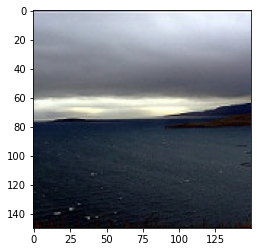

In [9]:
number = 10948
sample = np.reshape(X_train[:,number],(150,150,3))
print("The corresponding label is:")
print(Y_train[:,number])
print()
plt.imshow(sample)

Selecting a smaller set, so it can be trained faster on my PC!

In [10]:
rand = np.random.randint(0,14034,6000)
X_train = X_train[:,rand]
Y_train = Y_train[:,rand]
print("Shape of train data set:")
print(np.shape(X_train))
print(np.shape(Y_train))

Shape of train data set:
(67500, 6000)
(6, 6000)


**Creating a list of random minibatches from (X, Y) for Mini-Batch Gradient descent**

**Inputs** :  
*X*: input data, of shape (input size, number of examples)  
*Y*: true "label" vector of shape (6, number of examples)  
*mini_batch_size*: size of the mini-batches, integer

**Outputs** :  
*mini_batches*: list of synchronous (mini_batch_X, mini_batch_Y)

In [11]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):

    np.random.seed(seed)
    m = X.shape[1]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation] ##.reshape((1,m))

    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size :]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### 1.3. Normalization function

Normalizing any given set.

**Inputs** :  
*X*: 2D array

**Outputs** :  
*X_norm*: normalized X  
*mean*: mean of every feature (row)  
*std*: std of every feature (row)

In [12]:
def normalize(X):
    
    mean = np.mean(X,axis=1)
    mean = np.reshape(mean,(np.shape(mean)[0],1))
    std = np.std(X,axis=1)
    std = np.reshape(std,(np.shape(std)[0],1))
    
    X_norm = (X-mean)/std
    
    return X_norm , mean, std

## 2. Model Building

### 2.1. Initializing the model

**Initializing the model's parameters** (He Initialization)

**Inputs** :  
*layers_dims*: python array (list) containing the dimensions of each layer in the network

**Outputs** (python dictionary):  
*Wl*: weight matrix of shape (layers_dims[l], layers_dims[l-1])  
*bl*: bias vector of shape (layers_dims[l], 1)

In [13]:
def initialize_parameters(layers_dims):

    np.random.seed(1)
    parameters = {}
    L = len(layers_dims) - 1

    for l in range(1, L+1):
        parameters["W" + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1])*np.sqrt(2./layers_dims[l-1])
        parameters["b" + str(l)] = np.zeros((layers_dims[l],1))
        
        assert(parameters["W" + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layers_dims[l], 1))

        
    return parameters

**Initializing the Adam optimization variables**

**Inputs** :  
*parameters*: python dictionary containing parameters.

**Outputs** :  
*v*: python dictionary that will contain the exponentially weighted average of the gradient.  
*s*: python dictionary that will contain the exponentially weighted average of the squared gradient.

In [14]:
def initialize_adam(parameters) :
    
    L = len(layers_dims) - 1
    v = {}
    s = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = np.zeros(np.shape(parameters["W" + str(l+1)]))
        v["db" + str(l+1)] = np.zeros(np.shape(parameters["b" + str(l+1)]))
        s["dW" + str(l+1)] = np.zeros(np.shape(parameters["W" + str(l+1)]))
        s["db" + str(l+1)] = np.zeros(np.shape(parameters["b" + str(l+1)]))
    
    return v, s

**Implementing the sigmoid activation in numpy**

**Inputs** :  
*Z*: numpy array of any shape

**Outputs** :  
*A*: output of sigmoid(z), same shape as Z  
*cache*: returns Z as well (useful during backpropagation)

In [15]:
def sigmoid(Z):
    
    A = 1./(1.+np.exp(-Z))
    A = np.minimum(A, 1 - 1e-10)
    A = np.maximum(A, 1e-10)  
    cache = Z
    
    return A, cache

**Implementing the backward propagation for a single SIGMOID unit**

**Inputs** :  
*dA*: post-activation gradient, of any shape  
*cache*: 'Z' where I store for computing backward propagation efficiently

**Outputs** :  
*dZ*: Gradient of the cost with respect to Z

In [16]:
def sigmoid_backward(dA, cache):

    Z = cache
    
    s = 1./(1.+np.exp(-Z))
    s = np.minimum(s, 1 - 1e-10)
    s = np.maximum(s, 1e-10)  
    dZ = dA * s * (1.-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

**Implementing the ReLU function**

**Inputs** :  
*Z*: Output of the linear layer, of any shape

**Outputs** :  
*A*: Post-activation parameter, of the same shape as Z  
*cache*: a python dictionary containing "A" (stored for computing the backward pass efficiently)

In [17]:
def relu(Z):
    
    A = np.maximum(0,Z)
    cache = Z
    
    assert(A.shape == Z.shape)
    
    return A, cache

**Implementing the backward propagation for a single ReLU unit**

**Inputs** :  
*dA*: post-activation gradient, of any shape  
*cache*: 'Z' where I store for computing backward propagation efficiently

**Outputs** :  
*dZ*: Gradient of the cost with respect to Z

In [18]:
def relu_backward(dA, cache):

    Z = cache
    dZ = np.array(dA, copy=True)
    
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

**Implementing the softmax function**

**Inputs** :  
*Z*: Output of the linear layer, of any shape

**Outputs** :  
*A*: Post-activation parameter, of the same shape as Z  
*cache*: a python dictionary containing "A" (stored for computing the backward pass efficiently)

In [19]:
def softmax(Z):
    
    exp = np.exp(Z - Z.max(axis=0))
    A = exp / np.sum(exp,axis=0)
    cache = Z
    
    assert(A.shape == Z.shape)
    
    return A, cache

**Implementing the backward propagation for softmax**

**Inputs** :  
*dA*: post-activation gradient, of any shape  
*cache*: 'Z' where I store for computing backward propagation efficiently

**Outputs** :  
*dZ*: Gradient of the cost with respect to Z

In [20]:
def softmax_backward(dA, cache):

    Z = cache
    
    dZ = np.array(dA, copy=True)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

### 2.2. Forward propagation module

**Implementing the linear part of a layer's forward propagation**

**Inputs** :  
*A*: activations from previous layer (or input data): (size of previous layer, number of examples)  
*W*: weights matrix: numpy array of shape (size of current layer, size of previous layer)  
*b*: bias vector, numpy array of shape (size of the current layer, 1)

**Outputs** :  
*Z*: the input of the activation function (AKA pre-activation parameter)  
*cache*: a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

In [21]:
def linear_forward(A, W, b):

    Z = np.dot(W,A)+b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

**Implementing the forward propagation for the LINEAR->ACTIVATION layer**

**Inputs** :  
*A_prev*: activations from previous layer (or input data): (size of previous layer, number of examples)  
*W*: weights matrix: numpy array of shape (size of current layer, size of previous layer)  
*b*: bias vector, numpy array of shape (size of the current layer, 1)  
*activation*: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

**Returns** :  
*A*: the output of the activation function (AKA the post-activation value)  
*cache*: a python tuple containing "linear_cache" and "activation_cache" stored for computing the backward pass efficiently

In [22]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == "softmax":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = softmax(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

**Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SOFTMAX computation**

**Inputs** :  
*X*: data, numpy array of shape (input size, number of examples)  
*parameters*: output of initialize_parameters()

**Outputs** :  
*AL*: last post-activation value  
*caches*: list of caches containing every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)

In [23]:
def L_model_forward(X, parameters):

    caches = []
    A = X
    L = len(parameters) // 2
    
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation = "relu")
        caches.append(cache)
    
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "softmax")
    caches.append(cache)
    
    assert(AL.shape == (layers_dims[-1],X.shape[1]))
    
    return AL, caches

### 2.3. Cost function

**Implement the cost function**

**Inputs** :  
*AL*: probability vector corresponding to the label predictions, shape (number of classes (6), number of examples)  
*Y*: true "label" vector, shape (number of classes (6), number of examples)  
*layers_dims*: list containing the input size and each layer size, of length (number of layers + 1)  
*parameters*: python dictionary containing parameters "Wl", "bl"  
*lambd*: regularization parameter  

**Outputs** :  
*cost*: cross-entropy plus L2-regularization cost

In [24]:
def compute_cost(AL, Y , layers_dims, parameters, lambd):

    m = Y.shape[1]
    L = len(layers_dims) - 1

    cross_entropy_cost = (-1./m)*np.sum(Y*np.log(AL)) #+(1-Y)*np.log(1-AL))
    cross_entropy_cost = np.squeeze(cross_entropy_cost)
    
    L2_regularization_cost = 0
    for l in range(1, L+1):
        L2_regularization_cost += np.sum(np.square(parameters["W" + str(l)]))
    
    L2_regularization_cost = (lambd/(2*m))*L2_regularization_cost
    
    cost = cross_entropy_cost + L2_regularization_cost
    assert(cost.shape == ())
    
    return cost

### 2.4. Backward propagation module

**Implementing the linear portion of backward propagation for a single layer (layer l)**

**Inputs** :  
*dZ*: Gradient of the cost with respect to the linear output (of current layer l)  
*cache*: tuple of values (A_prev, W, b) coming from the forward propagation in the current layer  
*lambd*: regularization parameter  

**Outputs** :  
*dA_prev*: Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev  
*dW*: Gradient of the cost with respect to W (current layer l), same shape as W  
*db*: Gradient of the cost with respect to b (current layer l), same shape as b

In [25]:
def linear_backward(dZ, cache, lambd):

    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1./m)*np.dot(dZ,A_prev.T) + (lambd*W/m)
    db = (1./m)*np.sum(dZ,axis=1)
    db = np.reshape(db,(np.shape(db)[0],1))
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

**Implementing the backward propagation for the LINEAR->ACTIVATION layer**

**Inputs** :  
*dA*: post-activation gradient for current layer l  
*cache*: tuple of values (linear_cache, activation_cache)  
*activation*: the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"  
*lambd*: regularization parameter  

**Outputs** :  
*dA_prev*: Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev  
*dW*: Gradient of the cost with respect to W (current layer l), same shape as W  
*db*: Gradient of the cost with respect to b (current layer l), same shape as b

In [26]:
def linear_activation_backward(dA, cache, activation, lambd):

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, lambd)
        
    elif activation == "softmax":
        dZ = softmax_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, lambd)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, lambd)
    
    return dA_prev, dW, db

**Implementing the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group**

**Inputs** :  
*AL*: probability vector, output of the forward propagation (L_model_forward())  
*Y*: true "label" vector  
*caches*: list of caches containing every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2) and the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])  
*lambd*: regularization parameter  

**Outputs** :  
*grads*: A dictionary with the gradients

In [27]:
def L_model_backward(AL, Y, caches, lambd):

    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    
    dAL =  AL - Y #- (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "softmax", lambd)
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, "relu", lambd)
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

**Updating parameters using gradient descent**

**Inputs** :  
*parameters*: python dictionary containing parameters  
*grads*: python dictionary containing gradients, output of L_model_backward  
*learning_rate*: the gradient descent learning rate

**Outputs** :  
*parameters*: python dictionary containing updated parameters

In [28]:
def update_parameters(parameters, grads, learning_rate):
    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l + 1)]

    return parameters

**Updating parameters using Adam optimization**

**Inputs** :  
*parameters*: python dictionary containing parameters W and b  
*grads*: python dictionary containing gradients for each parameters dW db  
*v*: Adam variable, moving average of the first gradient, python dictionary  
*s*: Adam variable, moving average of the squared gradient, python dictionary  
*t*: counter for bias correction parameter in exponentially weighted average    
*learning_rate*: the learning rate, scalar  
*beta1*: Exponential decay hyperparameter for the first moment estimates  
*beta2*: Exponential decay hyperparameter for the second moment estimates  
*epsilon*: hyperparameter preventing division by zero in Adam updates

**Outputs** :  
*parameters*: python dictionary containing your updated parameters  
*v*: Adam variable, moving average of the first gradient, python dictionary  
*s*: Adam variable, moving average of the squared gradient, python dictionary

In [29]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    
    L = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}
    
    for l in range(L):
        v["dW" + str(l+1)] = beta1 * v["dW" + str(l+1)] + (1-beta1) * grads["dW" + str(l+1)]
        v["db" + str(l+1)] = beta1 * v["db" + str(l+1)] + (1-beta1) * grads["db" + str(l+1)]

        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)]/(1-(beta1**t))
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)]/(1-(beta1**t))

        s["dW" + str(l+1)] = beta2 * s["dW" + str(l+1)] + (1-beta2) * (grads["dW" + str(l+1)]**2)
        s["db" + str(l+1)] = beta2 * s["db" + str(l+1)] + (1-beta2) * (grads["db" + str(l+1)]**2)

        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)]/(1-(beta2**t))
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)]/(1-(beta2**t))

        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * \
                                     (v_corrected["dW" + str(l+1)]/(np.sqrt(s_corrected["dW" + str(l+1)])+epsilon))
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * \
                                     (v_corrected["db" + str(l+1)]/(np.sqrt(s_corrected["db" + str(l+1)])+epsilon))

    return parameters, v, s

### 2.5. Gradient checking

Checking if backward propagation computes correctly the gradient of the cost output by forward propagation

**Inputs** :  
*X*: input data  
*Y*: true "label"  
*layers_dims*: list containing the input size and each layer size, of length (number of layers + 1)  
*lambd*: regularization parameter  
*learning_rate*: learning rate of the gradient descent update rule  
*num_iterations*: number of iterations of the optimization loop  
*epsilon*: tiny shift to the input to compute approximated gradient

**Outputs** :  
*difference*: difference between the approximated gradient and the backward propagation gradient

In [30]:
def gradient_check(X, Y, layers_dims, lambd = 0.1, learning_rate = 0.009, num_iterations = 20, epsilon = 1e-7):
    
    nparameters = initialize_parameters(layers_dims)
    for i in range(num_iterations):
        parameters = nparameters.copy()
        AL, caches = L_model_forward(X, nparameters)
        grads = L_model_backward(AL, Y, caches, lambd)
        nparameters = update_parameters(nparameters, grads, learning_rate)
    
    L = len(parameters) // 2 
    parameter_values = np.empty((0,1))
    grad_values = np.empty((0,1))
    for l in range(L):
        new_vector = np.reshape(parameters["W" + str(l+1)], (-1,1))
        parameter_values = np.concatenate((parameter_values, new_vector), axis=0)
        new_vector = np.reshape(parameters["b" + str(l+1)], (-1,1))
        parameter_values = np.concatenate((parameter_values, new_vector), axis=0)
        new_vector = np.reshape(grads["dW" + str(l + 1)], (-1,1))
        grad_values = np.concatenate((grad_values, new_vector), axis=0)
        new_vector = np.reshape(grads["db" + str(l + 1)], (-1,1))
        grad_values = np.concatenate((grad_values, new_vector), axis=0)
        
    num_parameters = parameter_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))

    for i in range(num_parameters):
        thetaplus =  np.copy(parameter_values)
        thetaplus[i] = thetaplus[i] + epsilon
        parametersplus = {}
        count = 0
        for l in range(1, L+1):
            parametersplus["W" + str(l)] = thetaplus[count:count + layers_dims[l]*layers_dims[l-1]].reshape((layers_dims[l],layers_dims[l-1]))
            count += layers_dims[l]*layers_dims[l-1]
            parametersplus["b" + str(l)] = thetaplus[count:count + layers_dims[l]].reshape((layers_dims[l],1))
            count += layers_dims[l]
        AL, _ = L_model_forward(X, parametersplus)
        J_plus[i] = compute_cost(AL, Y , layers_dims, parametersplus, lambd)

        thetaminus =  np.copy(parameter_values)
        thetaminus[i] = thetaminus[i] - epsilon
        parametersminus = {}
        count = 0
        for l in range(1, L+1):
            parametersminus["W" + str(l)] = thetaminus[count:count + layers_dims[l]*layers_dims[l-1]].reshape((layers_dims[l],layers_dims[l-1]))
            count += layers_dims[l]*layers_dims[l-1]
            parametersminus["b" + str(l)] = thetaminus[count:count + layers_dims[l]].reshape((layers_dims[l],1))
            count += layers_dims[l]
        AL, _ = L_model_forward(X, parametersminus)
        J_minus[i] = compute_cost(AL, Y , layers_dims, parametersminus, lambd)

        gradapprox[i] = (J_plus[i]-J_minus[i])/(2*epsilon)
        if abs(gradapprox[i]-grad_values[i]) > 1e-1:
            print(i)
            
    numerator = np.linalg.norm(grad_values[i]-gradapprox[i])
    denominator = np.linalg.norm(grad_values[i]) + np.linalg.norm(gradapprox[i])
    difference = numerator/denominator
    
    
    
    if difference > 2e-7:
        print ("\033[93m" + "There is a mistake in the backward propagation! difference = " + str(difference) + "\033[0m")
    else:
        print ("\033[92m" + "Backward propagation works perfectly fine! difference = " + str(difference) + "\033[0m")
    
    return difference

### 2.6. L-layer neural network model

**Implementing a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.**

**Inputs** :  
*X*: data, numpy array of shape (num_px * num_px * 3, number of examples)  
*Y*: true "label" vector, of shape (6, number of examples)  
*layers_dims*: list containing the input size and each layer size, of length (number of layers + 1)  
*method*: optimization method, either gradient descent (gd) or adam  
*lambd*: regularization parameter  
*learning_rate*: learning rate of the gradient descent update rule  
*num_iterations*: number of iterations of the optimization loop  
*print_cost*: if True, it prints the cost every 100 steps

**Outputs** :  
*parameters*: parameters learnt by the model. They can then be used to predict  
*mean*: mean of training set samples to be used in normalization of test set  
*std*: std of training set samples to be used in normalization of test set

In [31]:
def L_layer_model(X, Y, layers_dims, method = "gd", lambd = 0.1, learning_rate = 0.0075, mini_batch_size = 64, num_epochs = 3000, print_cost=False):

    costs = []
    
    parameters = initialize_parameters(layers_dims)
    
    X, mean, std = normalize(X)
    
    seed = 0
    
    if method == "gd":
        pass
    elif method == "adam":
        t = 0
        v, s = initialize_adam(parameters)
    
    for i in range(num_epochs):
        
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        m = len(minibatches)
        cost_total = 0
        
        for minibatch in minibatches:
            
            (minibatch_X, minibatch_Y) = minibatch
            AL, caches = L_model_forward(minibatch_X, parameters)
            cost_total += compute_cost(AL, minibatch_Y , layers_dims, parameters, lambd)
            grads = L_model_backward(AL, minibatch_Y, caches, lambd)
            if method == "gd":
                parameters = update_parameters(parameters, grads, learning_rate)
            elif method == "adam":
                t = t + 1
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate)
        
        cost_avg = cost_total / m

        if print_cost and (i+1) % 10 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and (i+1) % 10 == 0:
            costs.append(cost_avg)

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('epochs (per 10)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters, mean, std

## 3. Predicting and Evaluation

### 3.1. Prediction function

**Predicting the results of a L-layer neural network**

**Inputs** :  
*X*: data set of examples  
*Y*: true labels of sample set  
*parameters*: parameters of the trained model  
*mean*: mean of training set samples    
*std*: std of training set samples

**Outputs** :  
*pred*: predictions for the given dataset X

In [32]:
def predict(X, Y, parameters, mean, std):
    
    X = (X-mean)/std
    
    m = Y.shape[1]
    n = len(parameters) // 2

    probas, caches = L_model_forward(X, parameters)

    pred = (probas==np.max(probas,axis=0)).astype(int)

    correct = np.sum(np.min((pred==Y).astype(int),axis=0))
    accuracy = correct/m*100
    
    print("Accuracy: %.2f %%" %(accuracy))
    
    return pred

### 3.2. Training the model

**Running gradient check**

In [33]:
np.random.seed(2)
X = np.random.randn(15,300)
Y = np.random.randn(3,300)
Y = (Y==Y.max(axis=0)).astype(int)
layers_dims = [15, 9, 8, 5, 3]
gradient_check(X, Y, layers_dims, lambd = 0.7, learning_rate = 0.007, num_iterations = 2000, epsilon = 1e-7)

Backward propagation works perfectly fine! difference = 9.002463537694066e-08


9.002463537694066e-08

**Setting constants**

In [34]:
layers_dims = [67500, 15, 12, 8, 6]

**Training the model**

Cost after epoch 0: 12.455938
Cost after epoch 10: 1.911196
Cost after epoch 20: 1.657481
Cost after epoch 30: 1.561392
Cost after epoch 40: 1.577512
Cost after epoch 50: 1.558190
Cost after epoch 60: 1.636578
Cost after epoch 70: 1.627478
Cost after epoch 80: 1.690983
Cost after epoch 90: 1.676852


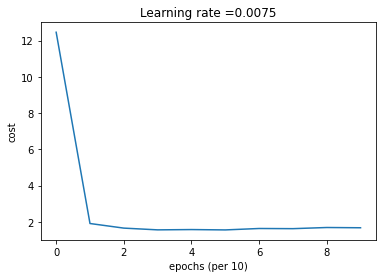

In [35]:
parameters, mean, std = L_layer_model(X_train, Y_train, layers_dims, method = "adam", lambd = 0.7, \
                                      learning_rate = 0.0075, mini_batch_size = 64, num_epochs = 100, print_cost=True)

### 3.3. Prediction and accuracy

**Train set accuracy**

In [36]:
pred_train = predict(X_train, Y_train, parameters, mean, std)

Accuracy: 49.05 %


**Test set accuracy**

In [37]:
pred_test = predict(X_test, Y_test, parameters, mean, std)

Accuracy: 48.37 %
